<h1>Machine learning</h1>
<li>Creating programs that learn
<li>The "learned" knowledge is not explicitly contained in the program
<li>The program is designed to learn using <b><span style="color:darkred">real world data</span></b>

<h2>Basic ideas</h2>
<li>The program contains a learning algorithm
<li>The program is given data
<li>The program applies the learning algorithm to the data and figures stuff out!

<h2>Terminology</h2>
<li><span style="color:darkblue">Feature</span>: A (measurable) property of the learning domain
<li><span style="color:darkblue">Feature set</span>: The set of features that are useful for learning in a given domain and a given problem
<ul>
<li>gender, age, income, other demographic data for predicting credit risk
<li>position of pupil, size of nose, presence/absence of dimples in facial data for facial recognition
<li>color, intensity of pixels in image data for image recognition
<li>moving averages, departures, technical indicators, price in stock price prediction
</ul>
<li><span style="color:darkblue">Input features</span>: The observable (useful) features in the domain
<li><span style="color:darkblue">Output features</span>: A feature that is being learned or predicted
<ul>
<li>In stock price prediction: moving averages, departures, technical indicators may be input features and the future return the output feature
<li>In face recognition: various observable facial features are the input feature and the person (name?) the output feature
</ul>
<li><span style="color:darkblue">Independent variables</span>: Synonymous with input feature, used in statistical learning
<li><span style="color:darkblue">Dependent variables</span>: Synonymous with output feature in prediction problems


<h2>Types of learning</h2>
<li><span style="color:darkblue">Supervised learning</span>: The data set contains paired input and output features and the machine learns how to get the output from the given input. In supervised learning, both input as well as output features are used in learning
<li><span style="color:darkblue">Unsupervised learning</span>: The data set contains features and the machine tries to induce concepts or knowledge from this feature set. Typically by organizing the data into "like" clusters. In unsupervised learning, only input features are used in learning

<h1>Examples of machine learning algorithms</h1>
<li><span style="color:darkblue">Regression</span>: The machine learns a mathematical relationship between the input and output features. Regression is a supervised learning technique
<li><span style="color:darkblue">Classification and regression trees (CART)</span>: The machine learns a set of rules that relate the input and output features. CART is a supervised learning technique
<li><span style="color:darkblue">Clustering</span>: Clustering algorithms group the input feature set into "like" groups, usually using a distance metric. Clustering algorithms are unsupervised learning techniques
<li><span style="color:darkblue">Neural networks</span>: Used for "deep learning". Designed to mimic the brain, neural networks are directed, weighted, multi-layered graphs. The first layer is an input layer that corresponds to the input feature set and the final layer is an output layer that corresponds to the output feature set. The graph contains one or more hidden layers and uses an algorithm to compute the weights on the edges to learn the relationship between input and output features. Neural networks are supervised learning techniques 

<h1>Machine learning using Regression</h1>
<li>The machine learns a mathematical relationship between the input feature set and output feature values
<li>All data must be numerical
<li>There is an implied sequence in both independent variable values as well as dependent variable values


<h3>Types of regression</h3>
<span style="color:darkblue">Linear regression</span>: Learns a mathematical linear relationship between input and output values
<li>Linear regression fits a line to the data
<li>Single output values
<li>Estimates a function of the form:$$ y = { \alpha + \beta_1}x_1 + {\beta_2}x_2 + ..... + {\beta_n}x_n + {\epsilon} $$
<li>The x values are independent variables
<li>The y value is the dependent variable
<li>The alpha is a constant intercept term
<li>The betas are the feature weights
<li>The epsilon is an error term


<span style="color:darkblue">Logistic regression</span><li>Predicts a categorical dependent variable value
<li>Binomial logistic regression predicts two category values (0 or 1)
<li>Typically, the function predicts:
<ul> <li>1 if $$ { \alpha + \beta_1}x_1 + {\epsilon} > 0 $$
<li>0 otherwise

<h1>Classification using regression</h1>
<li>sklearn has a logistic regression package but
<li>we will use linear regression to predict binomial categories
<li>because it is richer for analysis
<li>And examine some of the ways in which we evaluate our ML result


<h3>The data</h3>
<li>Rocks vs Mines (https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-dat)
<li>Though the data is about underwater mines, imagine:
<ol>
<li>You're looking out at a number of fields that have rock like objects strewn all over the place
<li>Some of those objects are actually mines
<li>You have special mine detecting equipment 
<li>The equipment sends sound waves at different frequencies, the waves hit the objects, and report back some sort of measurements
<li>Lucky (for you), you have prior sonar data along with whether a rock like object was a rock or a mine 
<li>You can use this to get your "machine" to learn how to identify rocks and mines
<li>And then test the results by sending your army across the field - and get an estimate of what it will cost you!

<h2>Read the data</h2>

<h3>Data set 1: Rocks vs. Mines</h3>
<li>Independent variables: sonar soundings at different frequencies
<li>Dependent variable (target): Rock or Mine

In [1]:
import pandas as pd
from pandas import DataFrame
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [2]:
df  # last column is the dependent variable here (column 61)
    # using the first 60 columns to predict whether something is going to be a rock or a mine.

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<h4>The data</h4>
<li>60 float64 columns. These are the sonar readings and will form our <span style="color:blue">feature set</span>
<li>One object column. This will be our target/output/dependent variable

<h2>Generate a few summary statistics</h2>

<h4>See all columns</h4>

In [4]:
pd.options.display.max_columns=70
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

<h4>Examine the distribution of the data in column 4</h4>

<li>Quartile 1: from .0067 to .03805
<li>Quartile 2: from .03805 to .0625
<li>Quartile 3: from .0625 to .100275
<li>Quartile 4: from .100275 to .401

<h4>Quartile 4 is much larger than the other quartiles. This raises the possibility of outliers</h4>

<h4> A Quantile - Quantile (qq) plot can help identify outliers</h4>
<li>y-axis contains values
<li>x-axis is the cumulative normal density function plotted as a straight line (-3 to +3)
<li>y-axis is the values ordered from lowest to highest
<li>the closer the curve is to the line, the more it reflects a normal distribution

When you get a dataset like this, you might want to evaluate the distribution of data within a single column to get a feel for the data and identify outliers. One way to do this is to compute a qq-plot. Evaluates whether the range of values within a column are normally distributed or not.

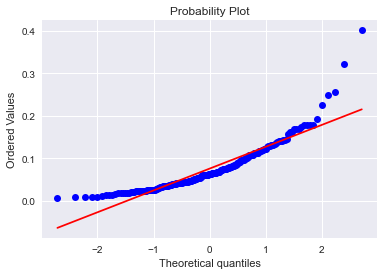

In [5]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(df[4], dist="norm", plot=pylab)
pylab.show()

If the data were normally distributed, it would fit relatively close to the red line. Here, it looks to be approximately normally distributed with a few outliers at the upper end.

<h4>Examine the dependent variable</h4>

In [6]:
df[60].unique()   # outputs the unique values in the dependent variable column.

array(['R', 'M'], dtype=object)

<h4>Examine correlations</h4>

In [7]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,0.344058,0.210861,0.210722,0.256278,0.304878,0.239079,0.137845,0.041817,0.055227,0.156760,0.117663,-0.056973,-0.163426,-0.218093,-0.295683,-0.342865,-0.341703,-0.224340,-0.199099,-0.077430,-0.048370,-0.030444,-0.031939,0.031319,0.098118,0.080722,0.119565,0.209873,0.208371,0.099993,0.127313,0.213592,0.206057,0.157949,0.279968,0.319354,0.230343,0.203234,0.247560,0.269287,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,0.297065,0.194102,0.249596,0.273170,0.307599,0.261844,0.152170,0.042870,0.040911,0.102428,0.075255,-0.074157,-0.179365,-0.196469,-0.295302,-0.365749,-0.337046,-0.234386,-0.228490,-0.115301,-0.055862,-0.049683,-0.108272,-0.004247,0.115824,0.132611,0.169186,0.217494,0.186828,0.098350,0.188226,0.261345,0.186368,0.133018,0.285716,0.304247,0.255797,0.265279,0.313995,0.245868,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,0.274610,0.214807,0.258767,0.291724,0.285663,0.237017,0.201093,0.120587,0.099303,0.103117,0.063990,-0.026815,-0.073400,-0.085380,-0.214256,-0.291974,-0.263111,-0.256674,-0.290728,-0.197493,-0.106198,-0.109895,-0.170671,-0.099409,0.017053,0.053070,0.107530,0.130276,0.110499,0.074137,0.189047,0.233442,0.113920,0.071946,0.180734,0.173649,0.179528,0.234896,0.223074,0.081096,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,0.271881,0.175381,0.215754,0.286708,0.278529,0.248245,0.223203,0.194992,0.189405,0.188317,0.142271,0.036010,-0.029749,-0.102975,-0.206673,-0.291357,-0.294749,-0.256074,-0.300476,-0.236602,-0.190086,-0.169987,-0.164651,-0.083965,0.015200,0.039282,0.063486,0.089887,0.089346,0.045141,0.145241,0.144693,0.050629,-0.008407,0.087824,0.080012,0.046109,0.121065,0.133294,0.077925,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,0.231684,0.211657,0.299086,0.359062,0.318059,0.328725,0.326477,0.299266,0.340543,0.285737,0.205088,0.152897,0.073934,-0.000624,-0.067296,-0.125675,-0.169618,-0.214692,-0.283863,-0.273350,-0.214336,-0.173485,-0.200586,-0.140559,-0.086529,-0.073481,-0.064617,-0.008620,0.063408,0.061616,0.098832,0.125181,0.063706,0.031575,0.089202,0.081964,0.041419,0.084435,0.088128,0.066751,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,0.333570,0.344451,0.411107,0.396233,0.367908,0.353783,0.293190,0.235778,0.226305,0.206841,0.174768,0.123770,0.064081,0.027026,-0.043280,-0.100309,-0.129094,-0.118645,-0.156081,-0.151186,-0.054136,-0.051934,-0.144391,-0.070337,-0.028815,-0.023621,-0.064798,-0.048745,0.030599,0.081119,0.075797,0.048763,0.034380,0.048870,0.085468,0.029524,0.016640,0.067196,0.080729,0.017300,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,0.396588,0.274432,0.365391,0.409576,0.411692,0.363086,0.250024,0.208057,0.215495,0.196496,0.165827,0.063773,0.009359,0.011982,-0.057147,-0.126074,-0.179526,-0.116848,-0.129694,-0.068142,-0.096945,-0.115871,-0.127052,-0.077662,-0.015531,0.002979,-0.001376,0.065900,0.080942,0.112673,0.041071,-0.028720,-0.025727,0.061404,0.110813,0.076537,0.098925,0.155221,0.194720,0.166112,0.184152,0.144051,0.046403,0.16

In [8]:
# For highly correlated variables, you should get rid of one since they provide similar 
# value in predicting the dependent variable. Generally, a correlation coefficient of 0.7 
# and above is considered highly correlated, even 0.6 is considered slightly high. 
# Anything 0.3 and below is generally considered low correlation. 

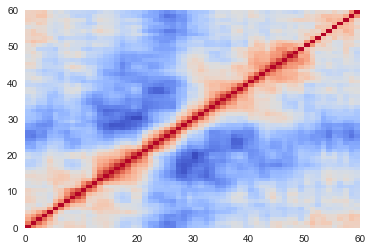

In [9]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

The diagonal is red, which indicates high correlation. The deeper the color red, the greater the correlation. Blue cells indicate low correlation.

<AxesSubplot:>

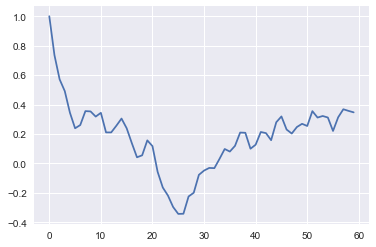

In [10]:
df.corr()[0].plot()
# Plots the correlation of column 0 with each of the other columns. 

We want features/variables that have correlation close to zero.

<h4>Highly correlated items = not good!</h4>
<h4>Low correlated items = good </h4>
<h4>Correlations with target (dv) = good (high predictive power)</h4>

<h2>Training a classifier on Rocks vs Mines</h2>
<li><span style="color:blue">scikit-learn</span>: A Python machine learning library
<li>!pip install sklearn --upgrade
<li>Make sure you have the latest version!

In [11]:
!pip freeze | grep sklearn
!pip install sklearn --upgrade
!pip freeze | grep sklearn

sklearn==0.0
sklearn==0.0


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

<h4>Convert labels R and M to 0 and 1</h4>

In [13]:
df[60]=np.where(df[60]=='R',0,1)  #Transforms dependent variable to a binary-{0,1} variable

Generally, the value 1 is assigned to the positive case, or the categorical value of interest. In this example, the positive cases are those that are mines; that is, observations labeled as a mine are assigned a value of 1. 

Note the use of the np.where() function here. Go back and review how this function, and others like it, works.

<h2>Training and testing</h2>
<li><span style="color:blue">Training dataset</span>: The model is "fit" using a training sample
<li><span style="color:blue">Testing dataset</span>: The "fitted" model is evaluated on a testing sample
<li><span style="color:blue">validation dataset</span>: Sometimes, a dataset is used to "fine tune" model parameters after training but before testing

<li>We'll use a training and testing dataset
<li>And separate out the feature set and target value for each dataset

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)  # This function splits the data by randomly sampling observations for the test set.
x_train = train.iloc[0:,0:60]  # x_train contains the matrix of features in the training set. This pulls ALL of the rows and the first 60 columns (column 0 to 59)
y_train = train[60]            # y_train contains the vector of labels in the training set. This pulls just the last column in the training dataset/matrix/dataframe.
x_test = test.iloc[0:,0:60]    # x_test contains the matrix of features in the test set. This pulls all rows and the first 60 columns (column 0 to 59) of the test set.
y_test = test[60]              # y_test contains the vector of labels in the test set. This pulls just the last column in the test dataset/matrix/dataframe.
y_train

104    1
5      0
60     0
28     0
105    1
      ..
121    1
19     0
73     0
129    1
134    1
Name: 60, Length: 145, dtype: int64

<h2>Build the model and fit the training data</h2>
<li>The linear regression package is in sklearn's linear_model library
<li>We create a linear regression model object
<li>And give it our training data to "fit" the model

In [15]:
from sklearn import linear_model
model = linear_model.LinearRegression()  # creates an (empty) instance of a linear regression model. It isn't model yet, just an instance of that class.
model.fit(x_train,y_train)      # model.fit() actually builds/trains the model on the data.


LinearRegression()

In [16]:
model.coef_

array([  5.46293937,  -0.80287911,  -3.33190989,   0.31974628,
         1.40972205,  -0.51209439,   0.25597951,   0.19220431,
         0.2941834 ,  -0.16216775,   0.40350384,   0.40422995,
         0.87713649,  -0.43353   ,  -0.01707655,  -0.56365684,
        -0.38520084,   1.03755055,  -0.64613162,   0.39726898,
        -0.3278828 ,   0.31314978,  -0.23244781,   1.07629235,
        -0.74735942,  -0.44533114,   0.97587217,  -0.49284488,
        -0.46055698,   1.94323842,  -2.59659452,   1.62832716,
        -0.75335135,  -0.31590974,   0.85501071,  -0.65352994,
        -0.37277949,   0.21053432,   0.66439412,  -0.91543053,
         0.68308536,  -0.29505086,   0.1214635 ,  -0.12001674,
         0.73527941,  -0.95972658,   1.1583877 ,   0.18544118,
         7.40274979, -12.97151857,  -2.89464576,   1.64247889,
        13.17110122,   0.82044035,  -9.61410007,  -0.6272827 ,
       -14.63321415,   8.90262116,   5.63495914,   5.32670554])

List of all coefficients for the linear regression model.

<h3>Get predictions</h3>
<li>Our predictions can be interpreted as "probabilities" that the predicted value is 1 (a mine)
<li>We can decide on a "threshold" value that assigns either a 1 or a 0 to each test case

In [17]:
testing_predictions  = model.predict(x_test)  # predicted values on test set
testing_predictions 

array([ 0.50479411,  0.36320841,  0.9829756 ,  1.02266226,  0.24430623,
        0.59670491,  0.6712571 , -0.53064883,  0.86559424,  0.8080569 ,
        0.66137266, -0.06542501,  1.02355208,  0.39202979,  0.36938657,
        0.31684501,  0.42871066,  1.4563553 , -0.06654082,  0.07361528,
        0.18192433, -0.12566483,  0.25360179,  0.69791699, -0.17819753,
        1.16704815,  0.80565295,  0.81315933,  0.92967156,  1.51501038,
        0.96096044,  0.54325931,  0.51991989,  0.15702841,  0.79457628,
        1.00325527,  0.72689114,  0.6382515 ,  0.16028218,  0.71038975,
        0.48451845,  0.90892665,  0.36882444,  1.00161742,  0.29833846,
        1.64716308,  1.01694365,  0.29253954,  1.28834361,  0.07854245,
        0.47560142,  0.19735419,  1.30274217,  0.16479454,  0.20612377,
        1.02916426,  0.89064313,  0.31680493,  0.76494999,  1.43644433,
        1.70766333,  0.98646552,  0.69133814])

To obtain a binary output from the continuous output of a linear regression model, choose a threshold value. Below, we choose a threshold value of 0.5. Anything above 0.5 will be labeled a 0, while everything above is a 1. 

In [18]:
def get_classification(predictions,threshold):
    classes = np.zeros_like(testing_predictions) # what's the shape of testing_predictions? (n,)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes

get_classification(testing_predictions,0.5)

array([1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.])

In this case, least squares (linear regression) was used for a classification problem which generally is not optimal in terms of accuracy. However, it can be done, but other methods will generally perform better for classification problems over linear regression. We will evaluate the performance using regression below.

<h2>Evaluating the model</h2>
<li><b>Confusion matrices</b>

<h3>Confusion matrix and the threshold</h3>
<li>A confusion matrix evaluates each data point in the testing dataset to see which of the following categories it falls into: 
<ol>
<li><span style="color:blue">true positive</span>: model predicts a mine (1) and it is a mine
<li><span style="color:blue">false positive</span>: model predicts a mine but it is a rock (0)
<li><span style="color:blue">true negative</span>: model predicts a rock and it is a rock
<li><span style="color:blue">false negative</span>: model predicts a rock and it is actually a mine
</ol>
<li>It then reports the number (or proportion) of cases in each category

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,get_classification(testing_predictions,0.5))

array([[22, 12],
       [ 4, 25]])

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,0.5)).ravel()
print(tn, fp, fn, tp)

22 12 4 25


<h3>Confusion matrix metrics</h3>
Using the results of the confusion matrix, we can calculate a number of metrics that will help evaluate the model
<ol>
<li><span style="color:blue">true positive rate</span> or <span style="color:blue">sensitivity</span> or <span style="color:blue">recall</span>
<li><span style="color:blue">true negative rate</span> or <span style="color:blue">specificity</span>
<li><span style="color:blue">false positive rate</span> or <span style="color:blue">fall out</span>
<li><span style="color:blue">precision</span> or <span style="color:blue">positive predictive value</span>
<li><span style="color:blue">f-score</span>
<li><span style="color:blue">accuracy</span>
<li><span style="color:blue">misclassification rate</span>


</ol>

<h3>True Positive rate/sensitivity/recall</h3>
True Positive Rate is the proportion of positive cases that are correctly identified as positive
$$ tpr = \frac{tp}{(tp + fn)} $$
Sensitivity is a measure of how good our model is in identifying the positive condition. A value of 1, for example, will mean that every positive value (every mine) was correctly idenfified by the model. 
<li>Percentage of persons with a disease correctly identified as having that disease
<li>Percentage of "fake news" items correctly identified as fake news
<li>Percentage of consumers who will click on an ad
<li>Percentage of customers who will move to a new cell phone carrier at the end of their contract

In [21]:
tpr = tp/(tp+fn)
print("Percentage of mines correctly identified as mines:",tpr)

Percentage of mines correctly identified as mines: 0.8620689655172413


<h3>True Negative Rate or Specificity</h3>
True Negative Rate is the proportion of negative cases that are correctly identified as negative
$$ tpr = \frac{tn}{(tn + fp)} $$
<li>Proportion of real news stories that are correctly identified as real news
<li>Proportion of healthy people that are correctly identified as healthy


In [22]:
tnr = tn/(tn+fp)
print(tnr)

0.6470588235294118


<h3>false positive rate or "fall out"</h3>
The false positive rate is the proportion of rocks that have been identified as mines
$$ fpr = \frac{fp}{(fp + tn)} $$

<li>Proportion of true news items that are identified as fake news
<li>Proportion of consumers who won't use a discount but are identified as target discount users
<li>Proportion of rocks that have been identified as mines

In [23]:
fpr = fp/(fp+tn)
print(fpr)

0.35294117647058826


<h3>Precision</h3>
Precision measures the proportion of cases identified as positive that are actually positive
$$ precision = \frac{tp}{(tp + fp)} $$
<li>Proportion of news items that are actually fake from amongst all the news items that are identified as fake
<li>Proportion of "churners" that are actual churners from amongst all customers identifed as churners
<li>Proportion of actual mines amongst all things that are identified as mines

In [24]:
precision = tp/(tp+fp)
print(precision)

0.6756756756756757


<h3>f-score</h3>
<li>Precision tells us how well our model discriminates amongst cases it identifies as positive. A precision of 1 would mean that if our model says something is positive, it is definitely a positive. 
<li>Recall tells us how good the model is at finding positives (a recall of 1 would mean it has found all positives). <li>Precision does not tell us how good we are at finding positives while recall does not tell us how good our model is at disciminating
<li>The f-score combines the two into a single score
$$ F = 2\frac{precision * recall}{(precision + recall)} $$


In [25]:
f = precision*tpr/(precision+tpr)*2
print(f)

0.7575757575757576


<h3>accuracy</h3>
Accuracy measures how accurately the model classifies things as positive or negative (mines or rocks)
$$accuracy = \frac{tp + tn}{(tp+tn+fp+fn)} $$
An accuracy of 1 would mean that our model has classified everything correctly

In [26]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.746031746031746


<h3>misclassification rate</h3>
Misclassifican rate is the inverse of accuracy. What proportion of the cases are misclassified?
$$ misclassificationRate = \frac{fp + fn}{(tp+tn+fp+fn)} $$


In [27]:
misclassification_rate = (fp + fn)/(tp+fp+tn+fn)
print(misclassification_rate)

0.25396825396825395


<h3>Examining our results</h3>


In [28]:
def c_m_analysis(true,pred,threshold):
    tn, fp, fn, tp = confusion_matrix(true,get_classification(pred,threshold)).ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f_score = 2*precision*tpr/(precision+tpr)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.2f identified as mines are mines"%(precision))
    print("Recall/TPR:\t\t\t%1.2f proportion of actual mines identified"%(recall))
    print("False Positive Rate:\t\t%1.2f proportion of rocks identified as mines"%fpr)
    print("f-score:\t\t\t%1.2f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.2f how well the model has classified"%(accuracy))

c_m_analysis(y_test,testing_predictions,0.5)

Precision:			0.68 identified as mines are mines
Recall/TPR:			0.86 proportion of actual mines identified
False Positive Rate:		0.35 proportion of rocks identified as mines
f-score:			0.76 tradeoff between precision and recall
Accuracy:			0.75 how well the model has classified


<h3>Threshold</h3>
<li>Our (regression) model is calculating continuous values between 0 and 1
<li>We're using a threshold of 0.5 to decide whether something is a rock or a mine
<li>What happens if we use a different threshold value?

In [29]:
c_m_analysis(y_test,testing_predictions,0.25)

Precision:			0.57 identified as mines are mines
Recall/TPR:			0.97 proportion of actual mines identified
False Positive Rate:		0.62 proportion of rocks identified as mines
f-score:			0.69 tradeoff between precision and recall
Accuracy:			0.65 how well the model has classified


Notice that lowering the threshold results in lower precision, but higher recall.

In [30]:
c_m_analysis(y_test,testing_predictions,0.75)

Precision:			0.69 identified as mines are mines
Recall/TPR:			0.62 proportion of actual mines identified
False Positive Rate:		0.24 proportion of rocks identified as mines
f-score:			0.77 tradeoff between precision and recall
Accuracy:			0.70 how well the model has classified


On the other hand, increasing the threshold results in lower recall, and slightly higher precision.

As the threshold increases:
<li>precision goes up
<li>recall goes down
<li>false positive rate goes down
<li>Why? See below!

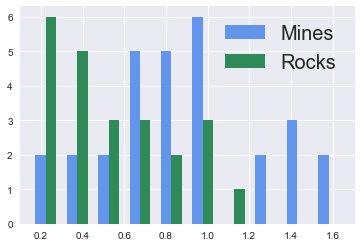

In [38]:
mines = list()
rocks = list()
actual = np.array(y_test)
for i in range(len(y_test)):
    
    if actual[i]:                             # if the i-th actual value is 1, put the i-th
        mines.append(testing_predictions[i])  # predicted value in the mines list.
    else:
        rocks.append(testing_predictions[i])  # Otherwise, put it in the rocks list.
df_m = pd.DataFrame(mines)   
df_r = pd.DataFrame(rocks)  # Creating dataframes because matplotlib works better with dataframes
fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(df_m)
b_heights, b_bins = np.histogram(df_r, bins=a_bins) # bins=a_bins assigns same number of bins to rocks histogram
width = (a_bins[1] - a_bins[0])/3   # a_bins is an array of numbers which corresponds to the mid-point of the blue bars. 
                                    # The height of the bar corresponds to the number of observations in that bin.
                                    # Taking the difference between two blue bars and dividing by 3 to compute the width we want for the bars.
mines_bars = ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
rocks_bars = ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
plt.legend([mines_bars,rocks_bars], ["Mines", "Rocks"], loc='upper right', prop={'size':20})


The blue bars to the left of a threshold value (not including the blue bar at the threshold) denote the number of false positives at that threshold. The green bars to the left indicate the number of true negatives.

This analysis/figure also illustrates that when precision goes up, recall goes down, and vice versa.

<h2>Trading off true positive rate and false positive rate</h2>

<h2>ROC: Receiver Operating Characteristic</h2>
<li>An ROC curve shows the performance of a binary classifier as the threshold varies 
<li>It contrasts
<ul>
<li>False positive rate (FPR) Fall out/false alarm on the x-axis
<li>True Positive rate (TPR) Sensitivity/recall on the y-axis
</ul>
<li>Each (fpr,tpr) coordinate is calculated for each threshold value and a curve plotted
<li>An <span style="color:blue">area under the curve (auc)</span> is calculated. 
<li>AUC gives us an estimate of how stable our model is to changes in threshold values



<h2>Drawing the ROC Curve</h2>
<li>sklearn has a function roc_curve that does this for us

In [32]:
from sklearn.metrics import roc_curve, auc

<h4>Out-sample ROC curve</h4>

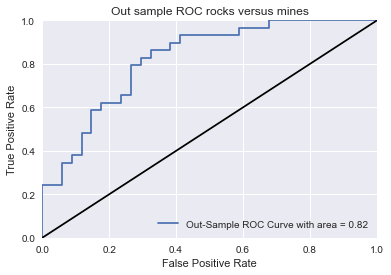

In [33]:
#training_predictions = model.predict(x_train)
#(fpr, tpr, thresholds) = roc_curve(y_train,training_predictions)

testing_predictions = model.predict(x_test)
(fpr, tpr, thresholds) = roc_curve(y_test,testing_predictions)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC rocks versus mines')
plt.legend(loc="lower right")
plt.show()

<h2>Precision vs. Recall</h2>
<li>Precision tells us how well we're discriminating within the positively identified  cases
<li>Recall tells us what proportion of actual positive cases we've identified as positive
<li>Obviously, we'd like both numbers to be close to 1!
<li>The precision-recall curve tells us how well we're doing on both factors for different threshold values
<li>We can also compute an <span style="color:blue">average precision (AP) metric</span>
<ul>
<li>AP computes a score at each threshold point
<li>Each score is the precision at that point multiplied by the change in recall from the previous threshold point
<li>These are then summed up to give a weighted average
<li>

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.79')

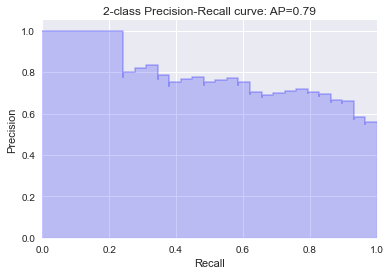

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

#precision, recall, thresholds = precision_recall_curve(y_train, training_predictions)
#average_precision = average_precision_score(y_train, training_predictions)


precision, recall, thresholds = precision_recall_curve(y_test, testing_predictions)
average_precision = average_precision_score(y_test, testing_predictions)

step_kwargs = ({'step' : 'post'})

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Notice that as Recall increases, Precision decreases.

<h2>So, what threshold should we actually use?</h2>
<li>ROC curves and precision-recall curves give you a sense for how good your classifier is and how sensitive it is to changes in threshold


<h3>Example: Let's say</h3>
<li>Everything classified as a rock needs to be checked with a hand scanner at $200/scan</li> 
<li>Everything classified as a mine needs to be defused at \$1000 if it is a real mine or \$300 if it turns out to be a rock</li>



In [35]:
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.1)).ravel()
cost1 = (tn+fn) * 200 + 1000 * tp + 300 * fp
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.5)).ravel()
cost2 = (tn+fn) * 200 + 1000 * tp + 300 * fp
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.9)).ravel()
cost3 = (tn+fn) * 200 + 1000 * tp + 300 * fp
print(cost1,cost2,cost3)

38500 33800 24300


<h3>Example: Let's say</h3>
<li>Everything classified as a rock will be assumed a rock and if wrong, will cost $5000 in injuries</li> 
<li>Everything classified as a mine will be left as is (no one will walk on it!)</li>


In [39]:
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.1)).ravel()
cost1 = 5000 * fn
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.5)).ravel()
cost2 = 5000 * fn
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.9)).ravel()
cost3 = 5000 * fn
print(cost1,cost2,cost3)

0 20000 75000


<h2>Bottom line: It depends on factors from your domain</h2>